<a href="https://colab.research.google.com/github/gcombarGitHub/github-slideshow/blob/my-slide/GrafosJuly31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


First: I load tow functions I will use, multiplot and normalize.



In [4]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}
###################################################################
normalize <- function(x) {                                        # 
  return ((x - min(x)) / (max(x) - min(x)))                 }     #
###################################################################

Read the data

In [5]:
library(readxl)
Datos <- read_excel("02_output_T1T2T3-interacting-with-T4.xlsx")
Dat <- Datos; 
names(Dat)[1]<- "X";  
names(Dat)[2]<- "Y"; 
names(Dat)[3]<- "weight";
Dat$weight <- as.numeric(Dat$weight)*100
Dat$Prot_A <- NULL; Dat$Prot_B<-NULL
head(Dat)

X,Y,weight
<chr>,<chr>,<dbl>
A0A0U1RRL7,A8K2U0,96.8
A0A0U1RRL7,O00425,94.5
A0A0U1RRL7,P03956,92.2
A0A0U1RRL7,P05019,96.0
A0A0U1RRL7,P08254,92.3
A0A0U1RRL7,P09237,91.0


Create the graph

In [6]:
install.packages("igraph") #install if necessary 
library(igraph)
g <- graph_from_data_frame(Dat, directed = FALSE)
dg <- decompose.graph(g)
print(paste("Graph with",
      length(degree(g)),
      "vertex",
      nrow(Dat),
      "edges and",
      length(dg),
      "Components."))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following object is masked _by_ ‘.GlobalEnv’:

    normalize


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




[1] "Graph with 1647 vertex 13537 edges and 8 Components."


Compute the components size

In [7]:
for (i in 1:length(dg))
{ 
  g <- dg[[i]]
  print(paste("Component", i, "size", length(degree(g)) ) )
}

[1] "Component 1 size 1602"
[1] "Component 2 size 3"
[1] "Component 3 size 15"
[1] "Component 4 size 6"
[1] "Component 5 size 7"
[1] "Component 6 size 2"
[1] "Component 7 size 9"
[1] "Component 8 size 3"


#The wholw graph

Compute the vertex values: Degree, Centrality, betweenness, page_rank, closeness

In [9]:
Vertex <- as.data.frame(degree(g))
Vertex$Degree <- normalize(as.numeric(Vertex$`degree(g)`))
Vertex$`degree(g)` <- NULL
Vertex$Centrality <- eigen_centrality(g)$vector
Vertex$Betweenness <- normalize(betweenness(g, normalized = TRUE ))
Vertex$PageRank <- normalize(page_rank(g)$vector)
Vertex$Closeness <- normalize(closeness(g))
Vertex$N <- c(1:length(Vertex$Degree))

Vertex$DegreeCat <- ifelse(Vertex$Degree < 0.5, "no", "yes")
Vertex$CentralityCat <- ifelse(Vertex$Centrality < 0.5, "no", "yes")
Vertex$BetweennessCat <- ifelse(Vertex$Betweenness < 0.5, "no", "yes")
Vertex$PageRankCat <- ifelse(Vertex$PageRank < 0.5, "no", "yes")
Vertex$ClosenessCat <- ifelse(Vertex$Closeness < 0.5, "no", "yes")

V_Original <- Vertex


head(Vertex)

,Degree,Centrality,Betweenness,PageRank,Closeness,N,DegreeCat,CentralityCat,BetweennessCat,PageRankCat,ClosenessCat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
A0A0U1RRL7,0.13513514,2.665655e-03,0.039184894,0.24743199,0.63524557,1,no,no,no,no,yes
A0A1B0GTR4,0.01351351,2.847789e-12,0.000000000,0.07435480,0.04267582,2,no,no,no,no,no
A0A1B0GUI7,0.01351351,1.076341e-07,0.001238685,0.06548585,0.25930578,3,no,no,no,no,no
A0A1B0GVZ6,0.05405405,1.051798e-04,0.001751407,0.07481698,0.55158383,4,no,no,no,no,yes
A0A2Z4LIS9,0.01351351,2.345483e-04,0.000000000,0.02811072,0.56552004,5,no,no,no,no,yes
A0JLT2,0.27702703,1.098171e-03,0.099005688,0.38509978,0.72141121,6,no,no,no,no,yes


All variables

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::groups()        masks igraph::groups()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::simplify()      masks igraph::simplify()



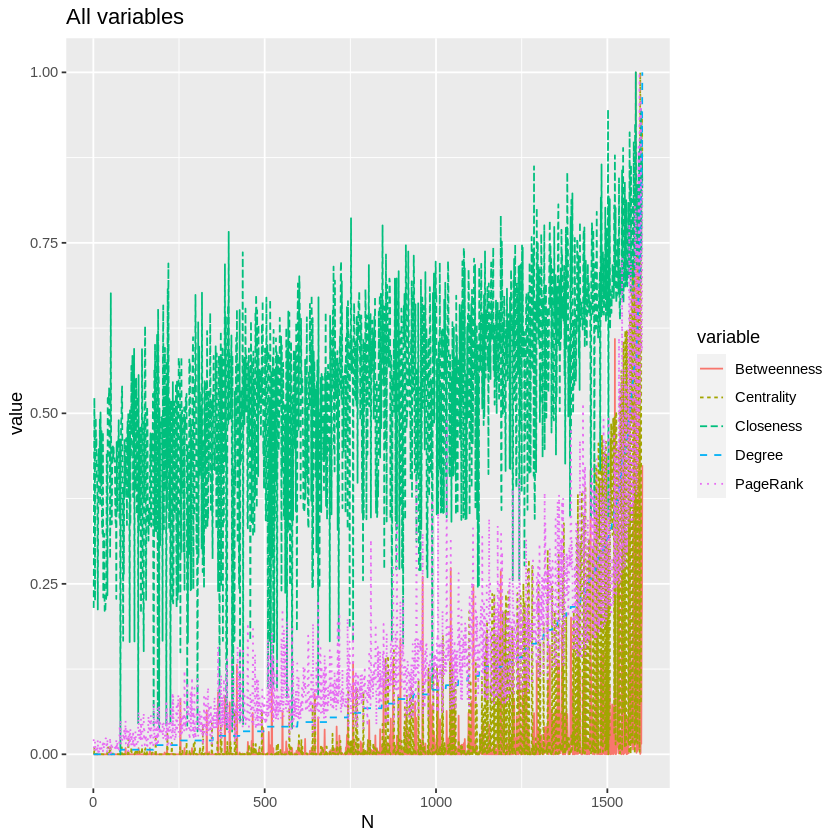

In [10]:
library("tidyverse")
Vertex <- Vertex[order(Vertex$Degree, decreasing = FALSE), ]
Vertex$N <- c(1:nrow(Vertex) )
df <- Vertex %>%
  select(N, Degree, Betweenness, Centrality, PageRank, Closeness) %>%
  gather(key = "variable", value = "value", -N)

ggplot(df, aes(x = N, y = value)) + 
  geom_line(aes(color = variable, linetype = variable))  +
  labs(title="All variables")

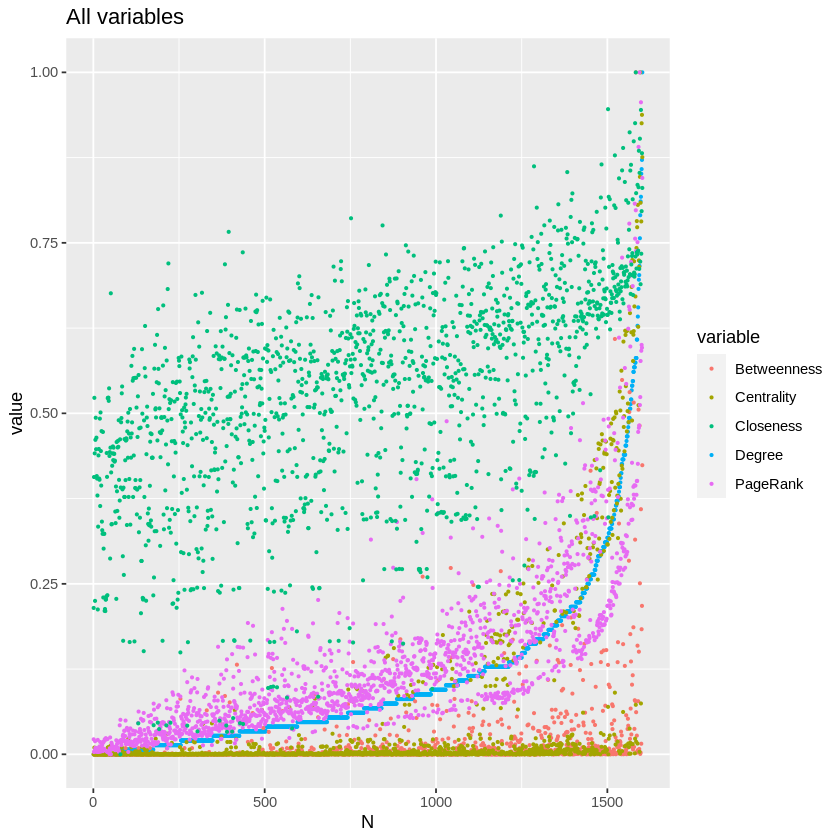

In [11]:
ggplot(df, aes(x = N, y = value)) + 
  geom_point(aes(color = variable), size=0.5)  +
  labs(title="All variables")

Select the top 50% in each value
**Degree**

In [13]:
VertexOrder <- Vertex[Vertex$DegreeCat == "yes",]
BestD <- NULL
BestD$Degree <- VertexOrder$Degree
BestD$id <- row.names(VertexOrder)
Best_Degree <- as.list(as.character(BestD$id))

**Centrality**

In [15]:
VertexOrder <- Vertex[Vertex$CentralityCat == "yes",]
Best <- NULL
Best$Centrality <- VertexOrder$Centrality
Best$id <- row.names(VertexOrder)
Best_Centrality <- as.list(as.character(Best$id))

**Betweenness**

In [19]:
VertexOrder <- Vertex[Vertex$BetweennessCat == "yes",]
Best <- NULL
Best$Betweenness <- VertexOrder$Betweenness
Best$id <- row.names(VertexOrder)
Best_Betweenness <- as.list(as.character(Best$id))

**PageRank**

In [16]:
VertexOrder <- Vertex[Vertex$PageRankCat == "yes",]
Best <- NULL
Best$PageRank <- VertexOrder$PageRank
Best$id <- row.names(VertexOrder)
Best_PageRank <- as.list(as.character(Best$id))

**Closeness**

In [17]:
VertexOrder <- Vertex[Vertex$ClosenessCat == "yes",]
Best <- NULL
Best$Closeness <- VertexOrder$Closeness
Best$id <- row.names(VertexOrder)
Best_Closeness <- as.list(as.character(Best$id))

#Venn Diagram


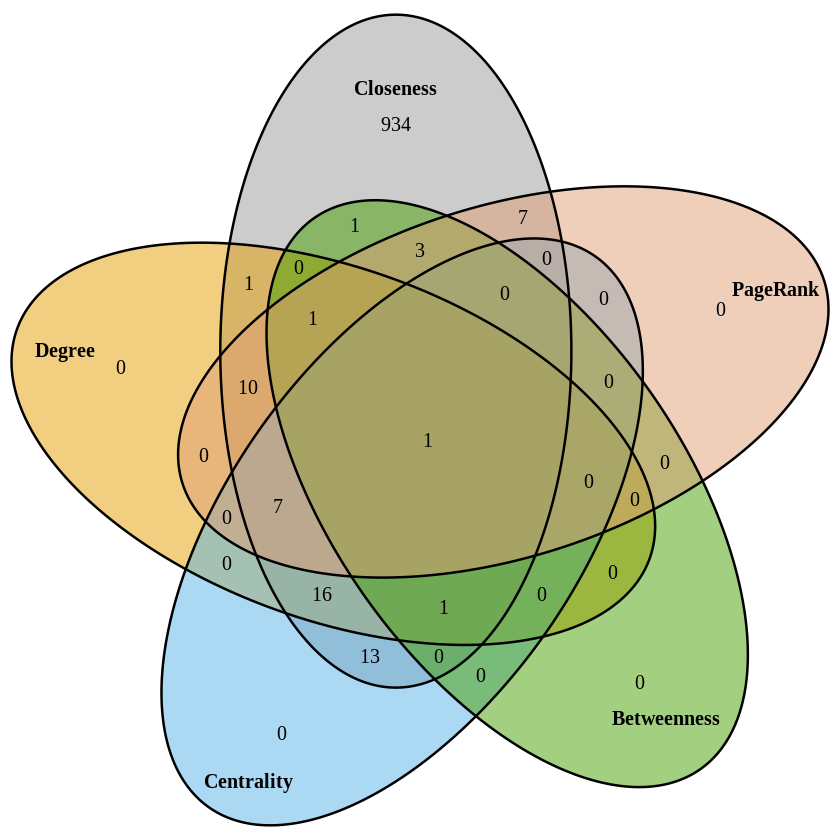

In [23]:
#install.packages("ggvenn")
library(ggvenn)
x <- list(
  Closeness = Best_Closeness, 
  Degree = Best_Degree,
  Centrality = Best_Centrality,
  Betweenness = Best_Betweenness,
  PageRank = Best_PageRank
)
#install.packages("VennDiagram")
library(VennDiagram)
display_venn <- function(x, ...){
  library(VennDiagram)
  grid.newpage()
  venn_object <- venn.diagram(x, filename = NULL, ...)
  grid.draw(venn_object)
}
display_venn(
  x,
  fill = c("#999999", "#E69F00", "#56B4E9", "#469F00", "#E09E75"),
  # Set names
  cat.cex = 1,
  cat.fontface = "bold",
  cat.default.pos = "outer",
  cat.dist = c(0.05, 0.08, 0.08, 0.06, 0.08)
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




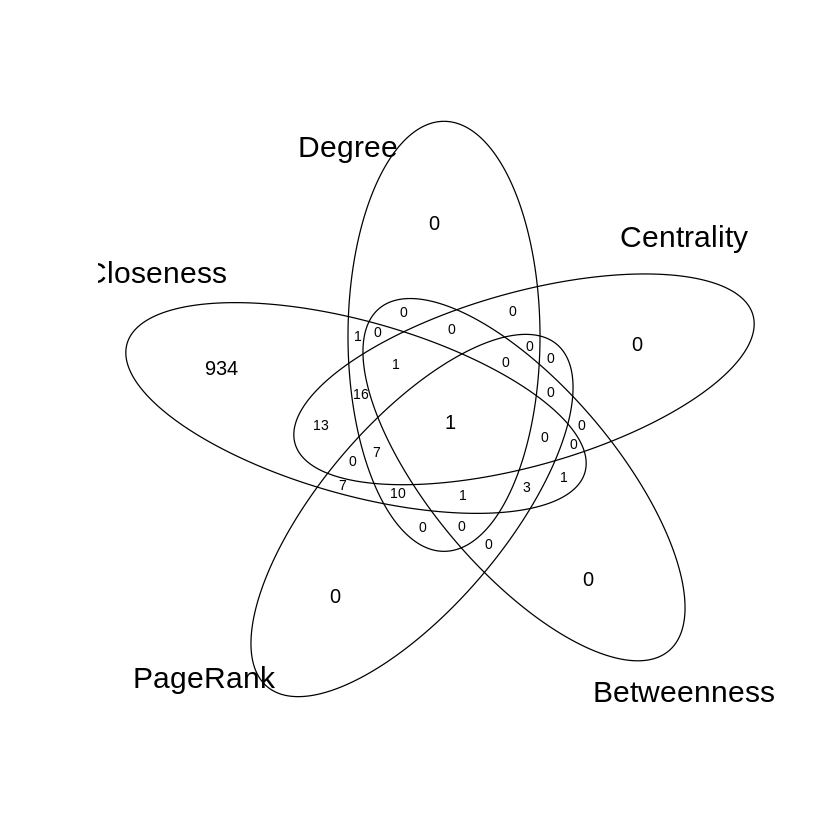

In [26]:
install.packages("gplots")
library(gplots)
isect <- attr(venn(x, intersection=TRUE), "intersection")


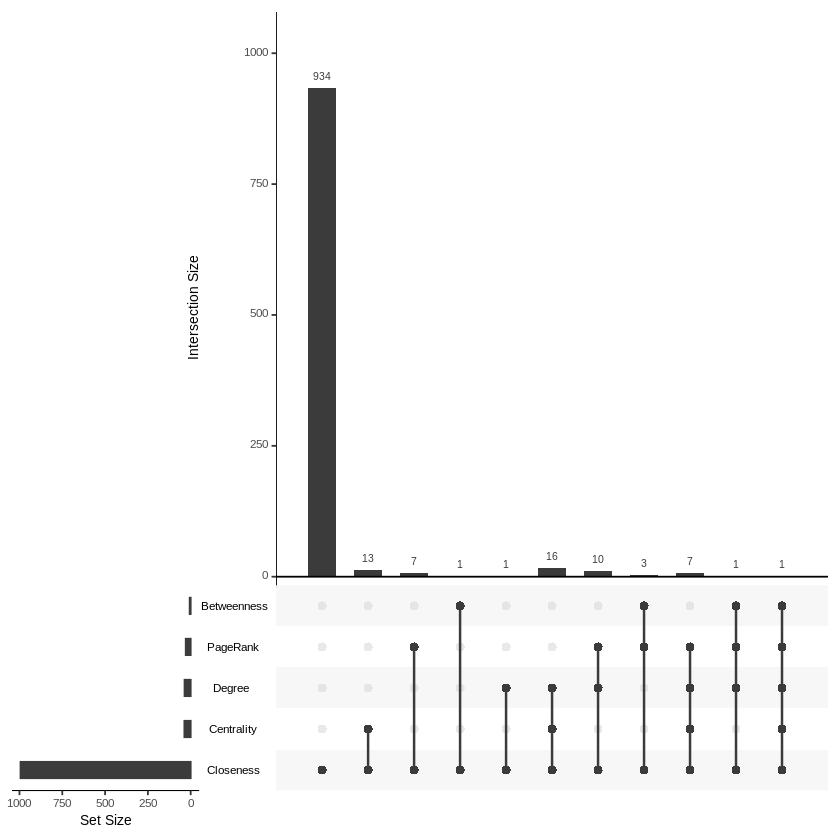

In [30]:
#install.packages("UpSetR")
library(UpSetR)
input <- c(
  Centrality = length(isect$Centrality),
#  Degree =length(isect$Degree),
  PageRank = length(isect$PageRank),
  Closeness =length(isect$Closeness), 
  Betweenness =length(isect$Betweenness),
 # "Degree&Centrality" =  length(isect$`Degree:Centrality`),
  "Degree&PageRank" =  length(isect$`Degree:PageRank`),
  "Degree&Closeness" =  length(isect$`Closeness:Degree`),
  "Degree&Betweenness" =  length(isect$`Degree:Betweenness`),
  "Centrality&PageRank" =  length(isect$`PageRank:Centrality`),
  "Centrality&Closeness" =  length(isect$`Closeness:Centrality`),
  "Centrality&Betweenness" =  length(isect$`Betweenness:Centrality`),
  "PageRank&Closeness" =  length(isect$`Closeness:PageRank`),
  "PageRank&Betweenness" =  length(isect$`Betweenness:PageRank`),
  "Betweenness&Closeness" =  length(isect$`Closeness:Betweenness`),
  "Degree&Centrality&PageRank" =  length(isect$`Degree:Centrality:PageRank`),
  "Degree&Centrality&Closeness" =  length(isect$`Closeness:Degree:Centrality`),
  "Degree&Centrality&Betweenness" =  length(isect$`Degree:Centrality:Betweenness`),
  "Degree&PageRank&Closeness" =  length(isect$`Closeness:Degree:PageRank`),
  "Degree&PageRank&Betweenness" =  length(isect$`Degree:Betweenness:PageRank`),
  "Degree&Closeness&Betweenness" =  length(isect$`Degree:Closeness:Betweenness`),
  "Centrality&PageRank&Closeness" =  length(isect$`PageRank:Centrality:Closeness`),
  "Centrality&PageRank&Betweenness" =  length(isect$`PageRank:Centrality:Betweenness`),
  "Centrality&Closeness&Betweenness" =  length(isect$`Closeness:Centrality:Betweenness`),
  "PageRank&Closeness&Betweenness" =  length(isect$`Closeness:Betweenness:PageRank`),
  "Degree&Centrality&PageRank&Closeness" =  length(isect$`Closeness:Degree:Centrality:PageRank`), 
  "Degree&Centrality&PageRank&Betweenness" =  length(isect$`Degree:Centrality:Betweenness:PageRank`),
  "Centrality&PageRank&Betweenness&Closeness" =  length(isect$`Centrality:PageRank:Betweenness:Closeness`),
  "Degree&PageRank&Betweenness&Closeness" =  length(isect$`Closeness:Degree:Betweenness:PageRank`),
#  "Degree&Centrality&Betweenness&Closeness" =  length(isect$`Closeness:Degree:Centrality:Betweenness`),
  "Degree&Centrality&PageRank&Betweenness&Closeness" =  length(isect$`Closeness:Degree:Centrality:Betweenness:PageRank`)
  )
upset(fromExpression(input))



#Modules

In [36]:
Functional_modules <- read_excel("Functional modules.xlsx")
Functional_modules <- Functional_modules[-c(1),]

Vertex$Module <- NA
for ( i in c( 1:length(rownames(Vertex)) )){
  if(length(which((Functional_modules)== rownames(Vertex)[i], arr.ind =T ) )>0 ){
    cl <- which((Functional_modules)== rownames(Vertex)[i], arr.ind = T)[1,2]
    Vertex$Module[i] <-colnames(Functional_modules)[cl]
  }
}

Vertex$Module2[Vertex$Module == "Acetylcholine-gated channel"] = "01"
Vertex$Module2[Vertex$Module == "Adenylate cyclase activity"] = "02"
Vertex$Module2[Vertex$Module == "Axon"] = "03"
Vertex$Module2[Vertex$Module == "B cell differentiation"] = "04"
Vertex$Module2[Vertex$Module == "Cell surface receptor signaling pathway"] = "05"
Vertex$Module2[Vertex$Module == "Chemokine-mediated signaling pathway"] = "06"
Vertex$Module2[Vertex$Module == "Early endosome"] = "07"
Vertex$Module2[Vertex$Module == "GABA-A receptor complex"] = "08"
Vertex$Module2[Vertex$Module == "Histone deacetylase binding"] = "09"
Vertex$Module2[Vertex$Module == "Insulin receptor siganling pathway"] = 10
Vertex$Module2[Vertex$Module == "Magnesium ion binding"] = 11
Vertex$Module2[Vertex$Module == "Neuropeptide signaling pathway"] = 12
Vertex$Module2[Vertex$Module == "Oxidation-reduction process"] = 13
Vertex$Module2[Vertex$Module == "Positivie regulation of peptidyl-tyrosine phosphorilation"] = 14
Vertex$Module2[Vertex$Module == "Protease binding"] = 15
Vertex$Module2[Vertex$Module == "RNA pol II distal enhancer sequence-specific DNA binding"] = 16
Vertex$Module2[Vertex$Module == "Transcription coregulator activity"] = 17
Vertex$Module2[Vertex$Module == "Transmembrane receptor protein tyrosine kinase signaling"] = 18
Vertex$Module2[Vertex$Module == "Ubiquitin protein ligase activity"] = 19
Vertex$Module2[Vertex$Module == "Voltage-gated calcium channel complex"] = 20


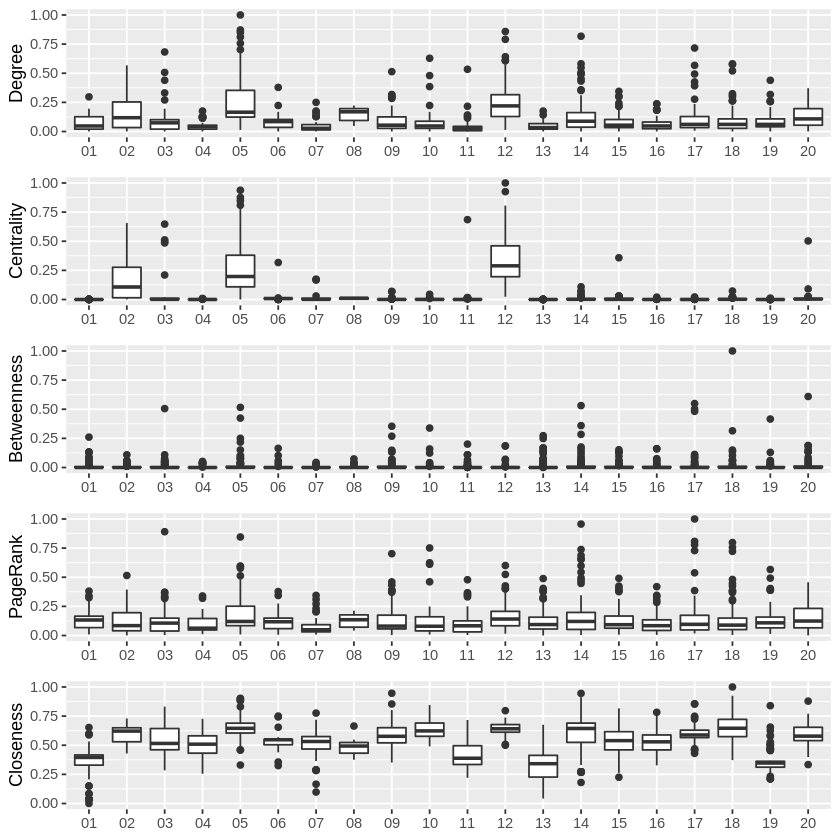

In [40]:
p0 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=Degree))+
  theme(axis.title.x=element_blank())
p1 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=Centrality))+
  theme(axis.title.x=element_blank())
p2 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=Betweenness))+
  theme(axis.title.x=element_blank())
p3 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=PageRank))+
  theme(axis.title.x=element_blank())
p4 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=Closeness))+
  theme(axis.title.x=element_blank())        
multiplot(p0, p1, p2, p3, p4, cols=1 )

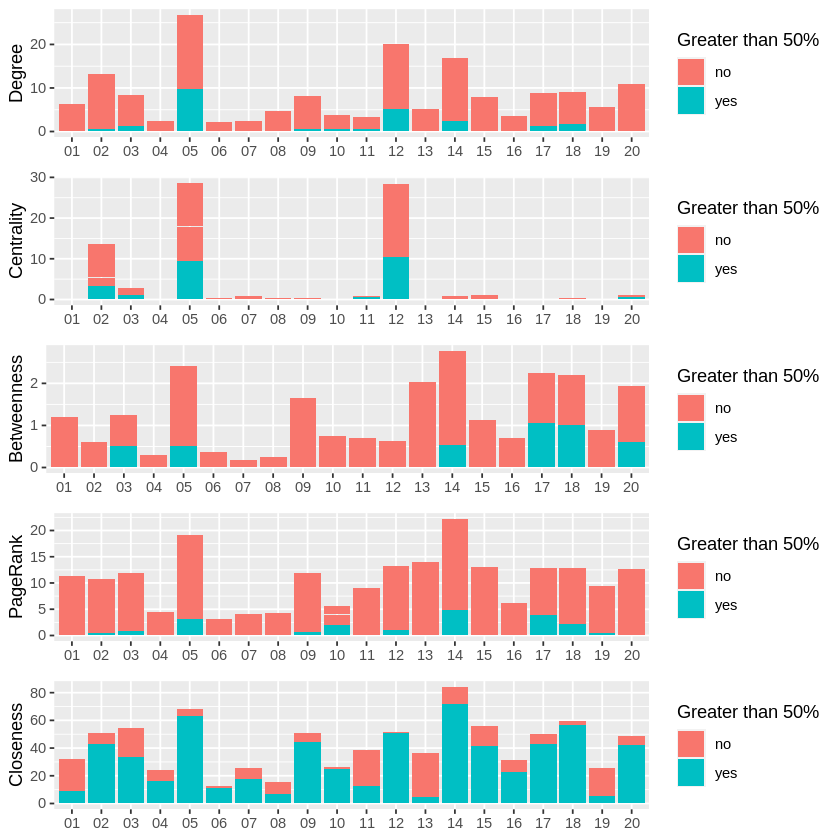

In [41]:

p0 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=Degree, fill=DegreeCat))+ 
  labs( fill = "Greater than 50%")+
  theme(axis.title.x=element_blank())
p1 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=Centrality, fill=CentralityCat))+ 
  labs( fill = "Greater than 50%") +
  theme(axis.title.x=element_blank())
p2 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=Betweenness, fill=BetweennessCat))+ 
  labs( fill = "Greater than 50%")+
  theme(axis.title.x=element_blank())
p3 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=PageRank, fill=PageRankCat))+ 
  labs( fill = "Greater than 50%")+
  theme(axis.title.x=element_blank())
p4 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=Closeness, fill=ClosenessCat))+ 
  labs( fill = "Greater than 50%") +
  theme(axis.title.x=element_blank())
multiplot(p0, p1, p2, p3, p4, cols=1 )